# **Dynamic Pricing Model for E-Commerce with Reinforcement Learning**
  Description: Create a pricing engine for e-commerce that optimizes prices in real time based on customer behavior, competitor pricing, and market trends. By using reinforcement learning, the model learns to adjust prices dynamically, maximizing profits while remaining competitive. The model could consider seasonality, supply and demand fluctuations, and user-specific factors like browsing history to make pricing decisions.


In [1]:
pip install numpy pandas matplotlib


Training complete. Final Q-Table size: 25


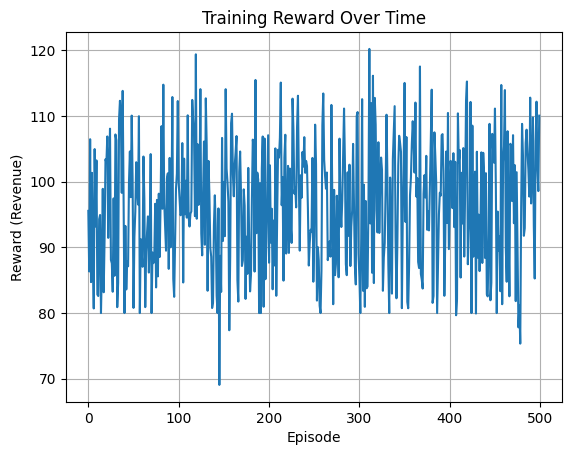

Optimal Price for state (1.0, 95): $80


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Environment Setup: Simulate customer behavior and competitor prices
class PricingEnvironment:
    def __init__(self, base_price=100):
        self.base_price = base_price
        self.customer_sensitivity = np.random.uniform(0.8, 1.2)  # customer response to price
        self.competitor_price = base_price

    def reset(self):
        self.customer_sensitivity = np.random.uniform(0.8, 1.2)
        self.competitor_price = np.random.randint(80, 120)
        return self._get_state()

    def _get_state(self):
        return (self.customer_sensitivity, self.competitor_price)

    def step(self, action_price):
        # Demand = inversely proportional to price difference
        price_diff = action_price - self.competitor_price
        demand = max(0, 1 - (price_diff / 100) * self.customer_sensitivity)
        reward = action_price * demand  # Revenue
        next_state = self.reset()
        return next_state, reward

# Q-Learning Agent
class PricingAgent:
    def __init__(self, price_range):
        self.q_table = {}
        self.actions = price_range
        self.alpha = 0.1
        self.gamma = 0.9
        self.epsilon = 0.1  # Exploration rate

    def get_state_key(self, state):
        # Discretize state
        sens, comp_price = state
        return (round(sens, 1), round(comp_price, -1))

    def choose_action(self, state_key):
        if state_key not in self.q_table:
            self.q_table[state_key] = np.zeros(len(self.actions))

        if np.random.rand() < self.epsilon:
            return np.random.choice(self.actions)
        else:
            return self.actions[np.argmax(self.q_table[state_key])]

    def learn(self, state_key, action, reward, next_state_key):
        action_idx = self.actions.index(action)
        if next_state_key not in self.q_table:
            self.q_table[next_state_key] = np.zeros(len(self.actions))

        next_max = np.max(self.q_table[next_state_key])
        current_q = self.q_table[state_key][action_idx]
        new_q = (1 - self.alpha) * current_q + self.alpha * (reward + self.gamma * next_max)
        self.q_table[state_key][action_idx] = new_q

# Training loop
env = PricingEnvironment()
agent = PricingAgent(price_range=list(range(80, 121, 5)))

rewards = []

for episode in range(500):
    state = env.reset()
    total_reward = 0

    for _ in range(1):  # 1 pricing decision per episode
        state_key = agent.get_state_key(state)
        action = agent.choose_action(state_key)
        next_state, reward = env.step(action)
        next_state_key = agent.get_state_key(next_state)

        agent.learn(state_key, action, reward, next_state_key)
        total_reward += reward
        state = next_state

    rewards.append(total_reward)

# Output: Show training progress
print("Training complete. Final Q-Table size:", len(agent.q_table))

# Plot training rewards
plt.plot(rewards)
plt.title("Training Reward Over Time")
plt.xlabel("Episode")
plt.ylabel("Reward (Revenue)")
plt.grid(True)
plt.show()

# Predict optimal price for a new state
test_state = (1.0, 95)  # average sensitivity, competitor price
test_key = agent.get_state_key(test_state)
optimal_price = agent.actions[np.argmax(agent.q_table.get(test_key, np.zeros(len(agent.actions))))]
print(f"Optimal Price for state {test_state}: ${optimal_price}")
